In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Se utilizar para mostrar la gráfica inmediatamente después del código
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
spotify=pd.read_csv('./drive/MyDrive/Top 100 most Streamed - Sheet1.csv')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Organizar el nombre de las columnas
spotify.columns = (
    spotify.columns
        .str.split(' \(')
        .str[0]
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(".","_"))

<ipython-input-4-43266e0faeb2>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(".","_"))


In [5]:
#Eliminamos la columna que no vamos a usar
to_drop = ["liveness"]
spotify.drop(to_drop, inplace=True, axis=1)

In [6]:
#Renombramos la columna title
spotify = spotify.rename(columns={'title':'title_song'})

In [7]:
spotify

,title_song,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_db,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,17,263,16,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,43,174,1,6,66
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,88,235,6,3,66
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,74,172,5,29,66
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,50,185,7,4,56


#Preguntas

### 1. Año que produjo más hits del top 100

El año que ha producido más hits ha sido el 2018, con un total de 20 hits presentes en el top 100.

In [8]:
hits_year=spotify.groupby(["year"],as_index=False).count() #agrupamos por año
hits_year=pd.DataFrame(hits_year) #convertimos el array en data frame
hits_year.loc[:,["year","title_song"]].sort_values("title_song", ascending=False) #seleccionamos las columnas año y titulo y ordenamos los valores por título

,year,title_song
10,2018,20
8,2016,16
11,2019,16
7,2015,13
9,2017,12
6,2014,6
5,2013,4
4,2012,3
12,2020,3
13,2021,3


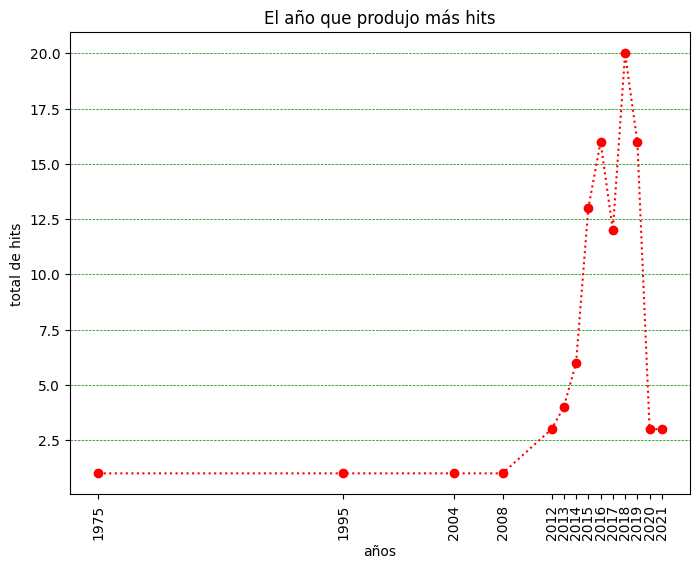

In [9]:
#hacemos la gráfica
plt.figure(figsize=(8,6)) #definimos el tamaño
plt.plot(hits_year["year"],hits_year["title_song"], "o:r") #definimos los valores de los ejes, agregamos color rojo y puntos a la línea
plt.grid(axis="y", color = 'green', linestyle = '--', linewidth = 0.5) #agregamos el grid para visualizar los datos
plt.title("El año que produjo más hits") #agregamos el título
plt.xlabel("años") #ponemos etiquetas
plt.ylabel("total de hits")

plt.xticks(hits_year["year"], rotation=90) #rotamos los labels en x para mejor visualización
plt.show()

### 2. El género más escuchado

Después de agrupar los estilos musicales similares se concluye que el género más escuchado ha sido pop, seguido por rap y rock.

In [10]:
#generos divididos
genre_years=spotify.groupby(["top_genre"],as_index=False).count() #agrupamos por género
genre_sorted=genre_years.sort_values("title_song",ascending=False) #organizamos los valores por el conteo
genre_sorted

,top_genre,title_song,artist,year,beats_per_minute,energy,danceability,loudness_db,valance,length,acousticness,speechiness,popularity
14,dance pop,28,28,28,28,28,28,28,28,28,28,28,28
30,pop,11,11,11,11,11,11,11,11,11,11,11,11
17,dfw rap,7,7,7,7,7,7,7,7,7,7,7,7
27,modern rock,6,6,6,6,6,6,6,6,6,6,6,6
10,canadian pop,6,6,6,6,6,6,6,6,6,6,6,6
8,canadian contemporary r&b,4,4,4,4,4,4,4,4,4,4,4,4
19,electropop,4,4,4,4,4,4,4,4,4,4,4,4
26,melodic rap,3,3,3,3,3,3,3,3,3,3,3,3
24,latin,2,2,2,2,2,2,2,2,2,2,2,2
21,folk-pop,2,2,2,2,2,2,2,2,2,2,2,2


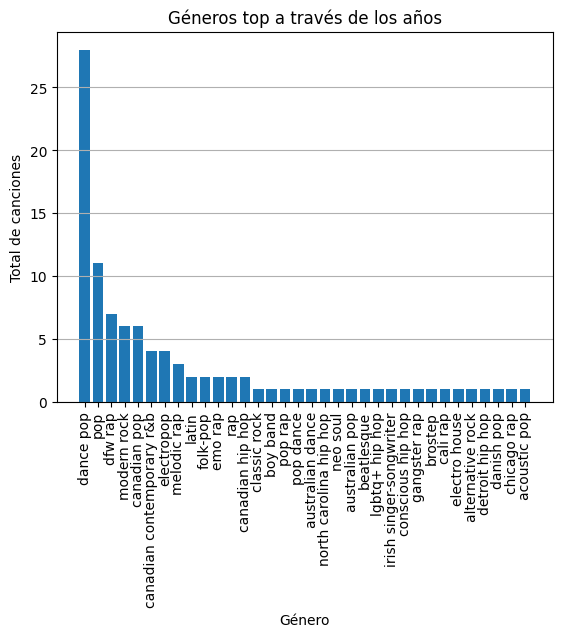

In [11]:
#hacemos la gráfica
plt.bar(genre_sorted["top_genre"],genre_sorted["title_song"]) #definimos los valores
plt.xticks(rotation=90) #rotamos los labels en x
plt.grid(axis="y") #agregamos grid
plt.title("Géneros top a través de los años") #ponemos título, y etiquetas en los ejes
plt.xlabel("Género")
plt.ylabel("Total de canciones")
plt.show()


In [12]:
#Géneros agrupados
pop=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("pop")] #filtramos la columna top_genre buscando la palabra pop
    ["title_song"].count() #contamos los títulos
)
rap=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("rap")]
    ["title_song"].count()
)
rock=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("rock")]
    ["title_song"].count()
)
rnb=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("r&b")]
    ["title_song"].count()
)
latin=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("latin")]
    ["title_song"].count()
)
hip_hop=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("hip hop")]
    ["title_song"].count()
)


In [13]:
top_genres=[hip_hop,latin,rnb,rock,rap,pop] #agrupamos los valores que obtuvimos en la agrupación anterior
genres_grouped=pd.DataFrame(top_genres, index=["hip_hop","latin","r&b","rock","rap","pop"], columns=["total"])
#creamos el data frame con los datos filtrados, definimos el index y el título de la columna
genres_grouped.sort_values("total",inplace=True) #organizamos los valores por el total de canciones
genres_grouped

,total
latin,2
r&b,4
hip_hop,6
rock,8
rap,18
pop,56


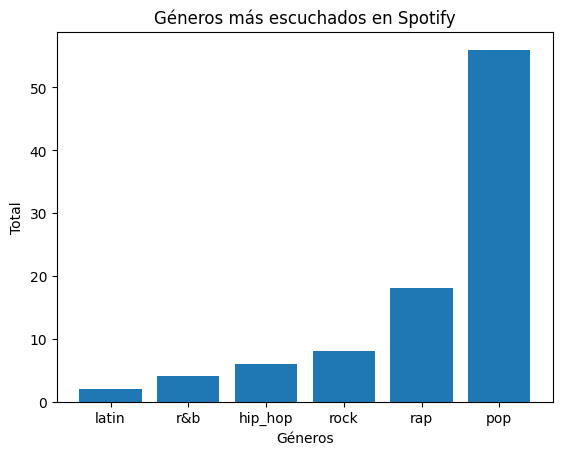

In [14]:
#Graficamos
plt.bar(genres_grouped.index,genres_grouped["total"]) #definimos los valores que definirán la gráfica
plt.title("Géneros más escuchados en Spotify") #ponemos título y nombre en los ejes
plt.xlabel("Géneros")
plt.ylabel("Total")
plt.show()

### 3. Cantante más escuchado

El cantante que ha tenido más éxitos y, por lo tanto, de quien se ha consumido más música es Post Malone, seguido por Ed Sheeran y, empatados en tercer lugar, Imagine Dragons y The Weeknd.

In [15]:
singer=spotify.groupby(["artist"],as_index=False)["title_song"].count() #agrupamos por artista, contamos por título
singer_sorted=singer.sort_values("title_song",ascending=False) #organizamos por la cantidad de títulos o canciones
singer_top_5=singer_sorted.head(5) #visualizamos solo los 5 primeros para saber cual es el top 5
singer_top_5

,artist,title_song
47,Post Malone,7
15,Ed Sheeran,5
21,Imagine Dragons,4
56,The Weeknd,4
40,Maroon 5,3


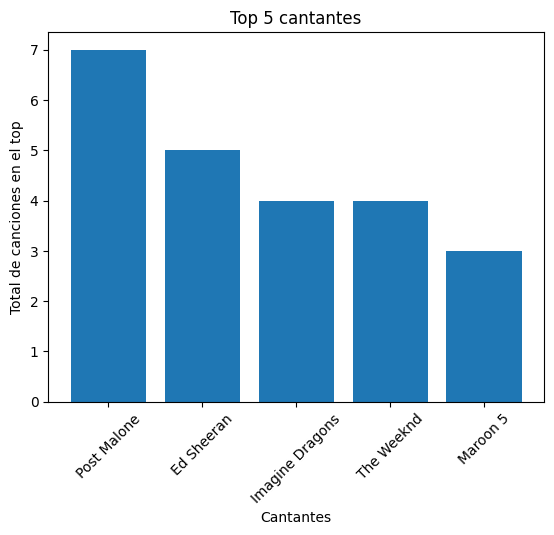

In [16]:
#graficamos
plt.bar(singer_top_5["artist"],singer_top_5["title_song"]) #definimos las variables en el eje x y eje y
plt.xticks(rotation=45) #rotamos las etiquetas para mejor visualización
plt.title("Top 5 cantantes") # escribimos títulos y nombres del eje x y eje y
plt.xlabel("Cantantes")
plt.ylabel("Total de canciones en el top")
plt.show()

### 4.¿Cuál es el género con más beats?

El género con más beats es la musica r&b, seguida de la música Latina y  hip hop. No muchos hits pertenecen a estos géneros, por lo cual se puede concluir que a mayor cantidad de beats no necesariamente estará entre las canciones más escuchadas.

In [17]:
#filtramos por géneros
pop_b=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("pop")] #filtramos por las celdas que tengan la palabra pop
    ["beats_per_minute"].sort_values() #organizamos los valores de beats por minutos de menor a mayor
)
rap_b=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("rap")]
    ["beats_per_minute"].sort_values()
)
rock_b=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("rock")]
    ["beats_per_minute"].sort_values()
)
rnb_b=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("r&b")]
    ["beats_per_minute"].sort_values()
)
latin_b=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("latin")]
    ["beats_per_minute"].sort_values()
)
hip_hop_b=(
    spotify
    .loc[spotify["top_genre"]
    .str.contains("hip hop")]
    ["beats_per_minute"].sort_values()
)


In [18]:
#Escogemos los dos últimos dígitos de cada lista para sacar un promedio
pop_b=pop_b.tail(2).mean()
rap_b=rap_b.tail(2).mean()
rock_b=rock_b.tail(2).mean()
rnb_b=rnb_b.tail(2).mean()
latin_b=latin_b.tail(2).mean()
hip_hop_b=hip_hop_b.tail(2).mean()

In [19]:
#unimos los datos obtenidos y creamos un data frame con el index definido y el nombre de la columna llamada "beats"
beats_genres=[hip_hop_b,latin_b,rnb_b,rock,rap_b,pop_b]
beats_grouped=pd.DataFrame(beats_genres, index=["hip_hop","latin","r&b","rock","rap","pop"], columns=["beats"])
beats_grouped.sort_values("beats",inplace=True) #organizamos los valores según los beats, modificamos el data frame con el método inplace para que el cambio quede guardado
beats_grouped

,beats
rock,8.0
pop,155.5
rap,157.5
hip_hop,160.5
latin,178.0
r&b,178.5


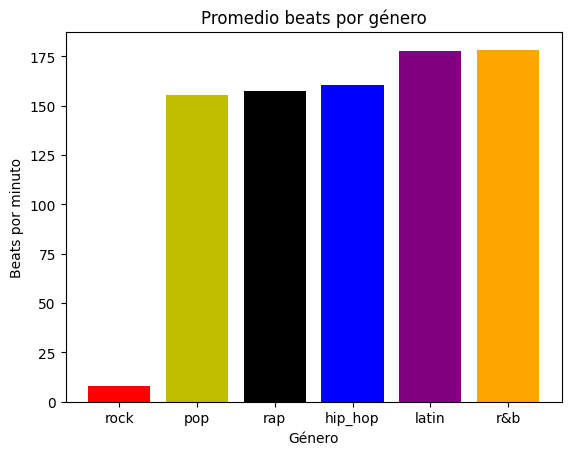

In [20]:
#Graficamos
plt.bar(beats_grouped.index,beats_grouped["beats"],color=['r', 'y', 'k', 'b', 'purple',"orange"]) #tomamos el index y la columna beats para graficar, definimos colores para las barras
plt.title("Promedio beats por género") #definimos títulos y etiquetas
plt.xlabel("Género")
plt.ylabel("Beats por minuto")
plt.show()

### 5. Cambio en la duración de las canciones a través de los años

Se puede concluir que la variación en la duración de las canciones es de disminución. En los últimos años se ve una tendencia a reducir la duración de las canciones.

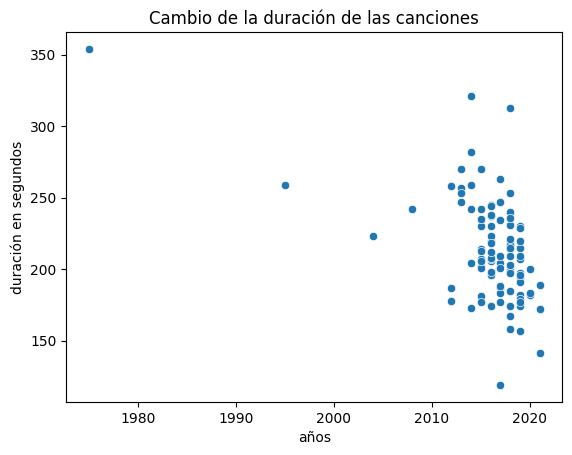

In [21]:
#Graficamos un scatterplot para ver la relación de las variables año y duración
sns.scatterplot(x=spotify["year"],y=spotify["length"])
plt.title("Cambio de la duración de las canciones") #definimos título, nombre eje x y eje y
plt.xlabel("años")
plt.ylabel("duración en segundos")
plt.show()

### 6. Relación de popularidad y beats por minuto

Se puede ver que a mayor cantidad de beats por minuto es más popular la canción, pero en su mayoria las canciones están por debajo de los 200 beats por minuto.

<ipython-input-22-1de7f09effdb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped=spotify.groupby(['year','artist']).sum().reset_index() # agrupamos por año y cantante


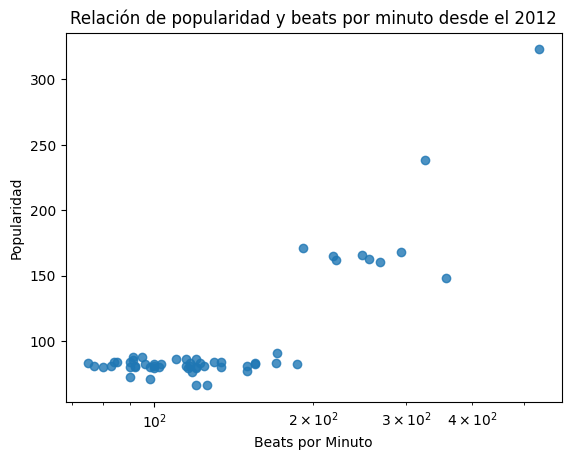

In [22]:

grouped=spotify.groupby(['year','artist']).sum().reset_index() # agrupamos por año y cantante
grouped.sort_values(['year','popularity'], ascending=[True,False], inplace=True) #organizamos los valores por año y popularidad
top_canciones=grouped.groupby('year').head(10) # creamos un data set agrupando por años
review=top_canciones.loc[lambda r: r['year']>=2015] #seleccionamos solo los años iguales o superiores a 2012

sns.regplot(x='beats_per_minute', y='popularity', data = review, fit_reg=False)
plt.xscale('log') #usamos escala logarítmica

# Agregamos las etiquetas a los ejes
plt.title('Relación de popularidad y beats por minuto desde el 2012')
plt.xlabel('Beats por Minuto')
plt.ylabel('Popularidad')
plt.show()

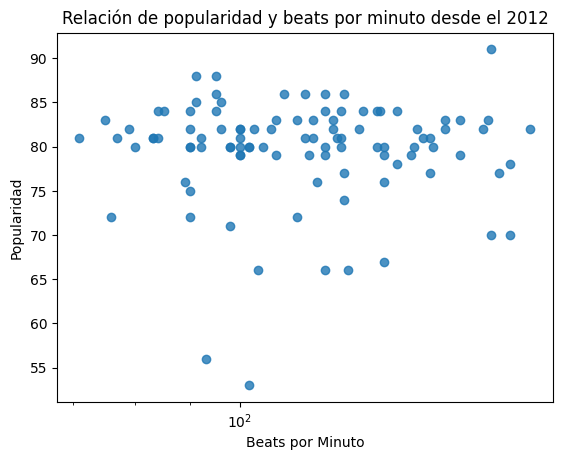

In [ ]:
# Scatter plot básico.
sns.regplot(x='beats_per_minute', y='popularity', data = spotify, fit_reg=False)
plt.xscale('log')   # aplicamos base logarítmica para visualizar mejor los datos

# Agregamos las etiquetas a los ejes
plt.title('Relación de popularidad y beats por minuto desde el 2012')
plt.xlabel('Beats por Minuto')
plt.ylabel('Popularidad')
plt.show()